# Compressive Concrete Strength Prediction Using Keras

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Heatmap
1. [Step 4: Data Preprocessing](#4) 
   - One-Hot Encoding
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
1. [Step 6: Normalizing the Data](#6)
1. [Step 7: Building a Model](#7)
1. [Step 8: K-Fold Validation](#8)
1. [Step 9: Training](#9)
1. [Step 10: Model Evaluation](#10)
   - MSE Score
1. [Step 11: Prediction](#11)

## Setting-up Envoirnment 

Firstly, we will import all the required libraries.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['figure.figsize']=(12,5)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
#!pip install openpyxl

<a id="1"></a> <br>
## Loading Data

In [2]:
df_main = pd.read_csv("../input/compressive-concrete-strength/compresive_strength_concrete.csv")

In [3]:
df_main.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Checking Shape and Size

In [4]:
print(df_main.shape)
print(df_main.size)

(1030, 9)
9270


<a id="2"></a> <br>
## Cleaning the Data

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

There is no missing value.

In [6]:
df_main.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<a id="3"></a> <br>
## Data Visualization

<AxesSubplot:>

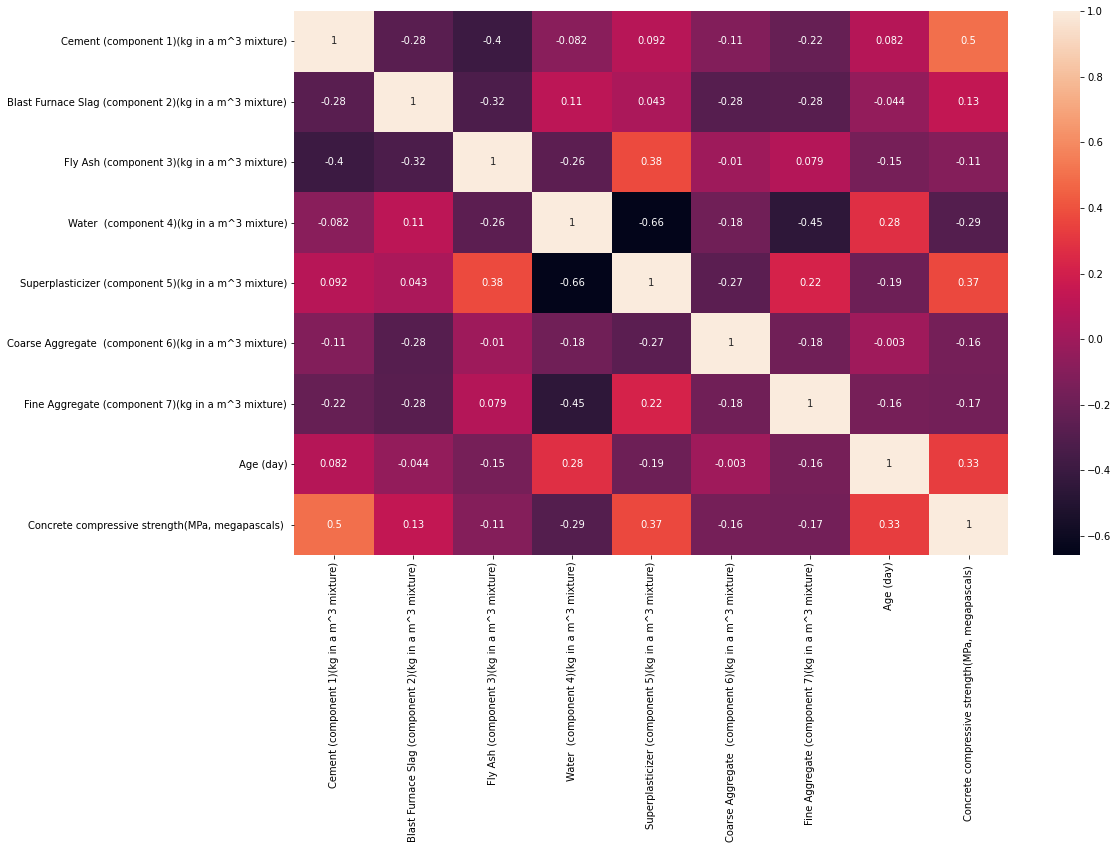

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df_main.select_dtypes(include=['int','float']).corr(),annot=True)

In [8]:
df_main.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
df_main.rename(columns={'Concrete compressive strength(MPa, megapascals) ': 'Concrete Compressive Strength(MPa)'}, inplace=True)

<a id="5"></a> <br>
## Splitting the Data
Splitting data into training and testing data.

In [10]:
# Training Data
np.random.seed(11111) # setting random value
msk = np.random.rand(len(df_main)) < 0.70
X_train = df_main[msk]
X_test = df_main[~msk]

In [11]:
print(len(X_train))
print(len(X_test))

744
286


In [12]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete Compressive Strength(MPa)
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


In [13]:
# Target Data 
y_train = X_train.pop('Concrete Compressive Strength(MPa)')
y_test = X_test.pop('Concrete Compressive Strength(MPa)')

In [14]:
{X_train.columns.get_loc(c): c for idx, c in enumerate(X_train.columns)}

{0: 'Cement (component 1)(kg in a m^3 mixture)',
 1: 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 2: 'Fly Ash (component 3)(kg in a m^3 mixture)',
 3: 'Water  (component 4)(kg in a m^3 mixture)',
 4: 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 5: 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 6: 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 7: 'Age (day)'}

<a id="6"></a> <br>
## Normalizing the Data
Here we are normalizing data by subtracting data by mean of the data and then dividing by standard deviation of the data.

In [15]:
X_mean = X_train.iloc[:,0:13].mean(axis=0) # taking mean of training data
X_train.iloc[:,0:13] -= X_mean # subtracting the mean from training data
X_std = X_train.iloc[:,0:13].std(axis=0) # taking std of training data
X_train.iloc[:,0:13] /= X_std # dividing train data by std
X_test.iloc[:,0:13] -= X_mean # subrating the mean from testing data
X_test.iloc[:,0:13] /= X_std # dividing test data by std

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [16]:
y_mean = y_train.mean() 
y_train -= y_mean
y_std = y_train.std()
y_train /= y_std
y_test -= y_mean
y_test /= y_std

### Changing Data Type To Float

In [17]:
X_train = np.asarray(X_train).astype(float)
X_test = np.asarray(X_test).astype(float)

y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

In [18]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

744
744
286
286


<a id="7"></a> <br>
## Building a Model

In [19]:
def build_model():
    model = Sequential()
    model.add(Dense(80 , activation='relu', input_shape=(X_train.shape[-1],))) # Input Layer
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(40 , activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(20 , activation='relu'))
    model.add(Dropout(0.5)) # Dropout Layer
    model.add(Dense(10 , activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Compiling Model
    return model

**Note** the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely
used loss function for regression problems.

In [20]:
build_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                720       
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2

<a id="8"></a> <br>
## K- Fold Validation

In [21]:
import numpy as np
k =  4 # no of folds
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
    print('processing fold #', i)
    val_X = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_y = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],  axis=0)
    # print(partial_train_data)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_X, val_y, verbose=0)
    all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


##### Validation MSE

In [22]:
val_mse

0.5005298256874084

In [23]:
all_scores_relu

[0.6256392598152161,
 0.5679102540016174,
 0.4714088439941406,
 0.5667577385902405]

<a id="9"></a> <br>
## Training
Here we will call model and train on the training data and evaluate on the test data.

In [24]:
model_relu = build_model()
model_relu.fit(X_train, y_train,epochs= 80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.3478 - mae: 0.4770


<a id="10"></a> <br>
## Model Evaluation

In [25]:
# MSE Score
test_mse_score

0.3477568030357361

In [26]:
# MAE Score
test_mae_score

0.4769989252090454

<a id="11"></a> <br>
## Prediction

In [27]:
x_relu = model_relu.predict(X_test[5].reshape(1,X_test.shape[1]))

 **Note** that here we will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate y = x * std + mean and then we will compare it with our target values.

In [28]:
x_relu * y_std + y_mean

array([[50.023773]], dtype=float32)

### Actual Value

In [29]:
 y_test[5] * y_std + y_mean 

41.15

### If this Kernel helped you in any way, some <span style="color:red">UPVOTES !!!</span> would be very much appreciated.